In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
from joblib import dump, load

print("All libraries were installed!!")

All libraries were installed!!


In [7]:
df= pd.read_excel("./Dataset/performance.xlsx")
df.head()

,Target_Days,Actual_Days,Remaining_Days,Actual_Work,Remaining_Work,Extrapolation,Status,Label
0,70,58,12,0.12,0.88,0.17,incomplete,0
1,67,33,34,0.19,0.81,0.51,incomplete,0
2,56,56,0,0.17,0.83,0.00,incomplete,0
3,22,1,21,0.45,0.55,0.95,complete,1
4,30,24,6,0.70,0.30,0.20,incomplete,0


In [8]:
#Selecting the columns

df=df.iloc[:,[0,1,2,3,4,7]]

In [52]:
print(f"Shape of the data {df.shape[0]} rows, {df.shape[1]} columns")

Shape of the data 2227 rows, 6 columns


In [26]:
df.head()

,Target_Days,Actual_Days,Remaining_Days,Actual_Work,Remaining_Work,Label
0,59,20,39,0.87,0.13,1
1,59,54,5,0.34,0.66,0
2,15,2,13,0.35,0.65,1
3,98,33,65,0.55,0.45,1
4,100,55,45,0.31,0.69,0


In [30]:
df.Label.value_counts().rename({1:"complete",0:"incomplete"})

complete      1131
incomplete    1096
Name: Label, dtype: int64

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Target_Days,2227.0,54.876066,26.558567,10.0,32.000,55.00,78.000,100.0
Actual_Days,2227.0,26.793444,21.770396,0.0,10.000,21.00,40.000,100.0
Remaining_Days,2227.0,28.082622,22.893017,0.0,9.000,22.00,42.000,97.0
Actual_Work,2227.0,0.504356,0.285349,0.0,0.270,0.51,0.745,1.0
Remaining_Work,2227.0,0.495644,0.285349,0.0,0.255,0.49,0.730,1.0
Label,2227.0,0.507858,0.500051,0.0,0.000,1.00,1.000,1.0


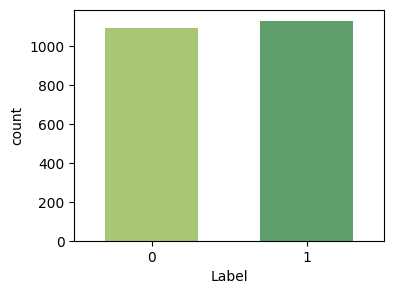

In [37]:
plt.figure(figsize=(4,3))
sns.countplot(x="Label", data=df, width=0.6,palette="summer_r")
plt.xlabel("Label")
# plt.xticks(ticks=["Incomplete","Complete"])
plt.show()

In [38]:
#Splitting the data
X=df.drop(["Label"],axis=1)
y=df["Label"]

In [39]:
s=StandardScaler()
X_std=s.fit_transform(X)

In [41]:
X_std

array([[ 0.15531183, -0.31211972,  0.47699392,  1.28168058, -1.28168058],
       [ 0.15531183,  1.24998492, -1.00850871, -0.57611014,  0.57611014],
       [-1.50177612, -1.1391163 , -0.65897868, -0.54105749,  0.54105749],
       ...,
       [ 0.72022818,  0.60676536,  0.25853765, -0.71632076,  0.71632076],
       [ 1.28514453,  0.00949006,  1.48189275, -1.73284776,  1.73284776],
       [-1.65242048, -0.95533928, -1.00850871, -1.66274245,  1.66274245]])

In [43]:
print(list(df.columns))

['Target_Days', 'Actual_Days', 'Remaining_Days', 'Actual_Work', 'Remaining_Work', 'Label']


In [45]:
cols = ['Target_Days', 'Actual_Days', 'Remaining_Days', 'Actual_Work', 'Remaining_Work']
X_std = pd.DataFrame(X_std,columns=cols)
y= pd.DataFrame(y)

final_data= pd.concat([X_std,y],join="outer",axis=1)
final_data.head()

,Target_Days,Actual_Days,Remaining_Days,Actual_Work,Remaining_Work,Label
0,0.155312,-0.312120,0.476994,1.281681,-1.281681,1
1,0.155312,1.249985,-1.008509,-0.576110,0.576110,0
2,-1.501776,-1.139116,-0.658979,-0.541057,0.541057,1
3,1.624094,0.285156,1.612967,0.159996,-0.159996,1
4,1.699417,1.295929,0.739141,-0.681268,0.681268,0


In [46]:
from joblib import dump, load
dump(s, 'model_scaler.pkl')

['model_scaler.pkl']

In [47]:
final_data.to_excel("./Dataset/Scaled_Attrition_dataset.xlsx",index=False)

Reloading the Data

In [48]:
df = pd.read_excel("./Dataset/Scaled_Attrition_dataset.xlsx")


Model Building

In [49]:
X=df.drop(["Label"],axis=1)
y= df["Label"]
X.head()

,Target_Days,Actual_Days,Remaining_Days,Actual_Work,Remaining_Work
0,0.155312,-0.312120,0.476994,1.281681,-1.281681
1,0.155312,1.249985,-1.008509,-0.576110,0.576110
2,-1.501776,-1.139116,-0.658979,-0.541057,0.541057
3,1.624094,0.285156,1.612967,0.159996,-0.159996
4,1.699417,1.295929,0.739141,-0.681268,0.681268


In [50]:
from random import shuffle
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(1558, 5)
(669, 5)
(669,)
(1558,)


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [54]:
lr=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4783, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

dt=DecisionTreeClassifier(random_state=0)
knn=KNeighborsClassifier()

In [55]:
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.9088575096277278
0.8849028400597907


In [56]:
#finding out the most optimal estimator

param={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
gs=GridSearchCV(knn,param,cv=3,scoring='roc_auc')
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [57]:
gs.best_params_

{'n_neighbors': 12, 'weights': 'distance'}

In [60]:
#finding out the most optimal estimator
params={'criterion':['entropy','gini']}
gdt=GridSearchCV(dt,param_grid=params,cv=3,scoring='roc_auc')
gdt.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini']}, scoring='roc_auc')

In [61]:
print(gdt.best_params_)
print(gdt.best_score_)

{'criterion': 'entropy'}
0.9434319158466661


In [89]:
lr=LogisticRegression()
dt=DecisionTreeClassifier(criterion = "entropy")
rf=RandomForestClassifier(n_estimators=15)
nb=GaussianNB()
knn=KNeighborsClassifier()
bag=BaggingClassifier(n_estimators=9)
ada=AdaBoostClassifier(n_estimators=8)
gdb=GradientBoostingClassifier(n_estimators=70)
model=[]
model.append(('Logistic Regression',lr))
model.append(('Decision Tree',dt))
model.append(('Random Forest',rf))
model.append(('Naive Bayes',nb))
model.append(('KNeighborsClassifier',knn))
model.append(('Bagging Classifier',bag))
model.append(('AdaBoostClassifier',ada))
model.append(('GradientBoostingClassifier',gdb))
cols=[]
train=[]
test=[]
prc=[]
rec=[]
results = []
names = []
bias=[]
variance=[]
scoring = 'roc_auc'
for k,v in model:
    v.fit(X_train,y_train)
    y_pred=v.predict(X_test)
    Train=v.score(X_train,y_train)
    Test=v.score(X_test,y_test)
    precesion=metrics.precision_score(y_test,y_pred,average='macro')
    recall=precesion=metrics.recall_score(y_test,y_pred,average='macro')
    cols.append(k)
    train.append(Train)
    test.append(Test)
    prc.append(precesion)
    rec.append(recall)
    TEST=pd.DataFrame(test,columns=["TEST_Accuracy"],index=cols)
    TRAIN=pd.DataFrame(train,columns=["TRAIN_Accuracy"],index=cols)
    PRECISION=pd.DataFrame(prc,columns=["PRECISION"],index=cols)
    RECALL=pd.DataFrame(rec,columns=["RECALL"],index=cols)

    data=pd.concat([TRAIN,TEST,PRECISION,RECALL],axis=1)
print(data)

                            TRAIN_Accuracy  TEST_Accuracy  PRECISION    RECALL
Logistic Regression               0.908858       0.884903   0.884833  0.884833
Decision Tree                     1.000000       0.940209   0.940205  0.940205
Random Forest                     0.999358       0.952167   0.952149  0.952149
Naive Bayes                       0.872914       0.849028   0.848977  0.848977
KNeighborsClassifier              0.981386       0.959641   0.959617  0.959617
Bagging Classifier                0.999358       0.956652   0.956614  0.956614
AdaBoostClassifier                0.912067       0.877429   0.877496  0.877496
GradientBoostingClassifier        0.995507       0.961136   0.961114  0.961114


In [90]:
for name,models in model:
    kfold = KFold(n_splits=3, random_state=0,shuffle=True)
    cv_results = cross_val_score(models, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    bias=np.mean(results)
    variance=np.var(results,ddof=1)
    names.append(name)
    BIAS=pd.DataFrame(bias,columns=["Bias_Error"],index=names)
    VARIANCE=pd.DataFrame(variance,columns=["Varaince_Error"],index=names)
    errors_data=pd.concat([BIAS,VARIANCE],axis=1)

print(errors_data)

                            Bias_Error  Varaince_Error
Logistic Regression            0.97462        0.000491
Decision Tree                  0.97462        0.000491
Random Forest                  0.97462        0.000491
Naive Bayes                    0.97462        0.000491
KNeighborsClassifier           0.97462        0.000491
Bagging Classifier             0.97462        0.000491
AdaBoostClassifier             0.97462        0.000491
GradientBoostingClassifier     0.97462        0.000491


In [91]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score
classifiers=[['Logistic Regression :',LogisticRegression()],    
       ['Decision Tree Classification :',DecisionTreeClassifier(criterion='entropy',random_state=0)],
       ['Random Forest Classification :',RandomForestClassifier(n_estimators=15,random_state=0)],
        ['Knn Classifier:',KNeighborsClassifier(n_neighbors= 12, weights= 'distance')],['Naive Bayes Classifier:',GaussianNB()],
        ['Bagging Classifier:',BaggingClassifier(n_estimators=9,random_state=0)],["Ada BoostClassifier:", AdaBoostClassifier(n_estimators=8)],
        ["Gradient Classifier:",GradientBoostingClassifier(n_estimators=70)]
       ]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    print(name,accuracy_score(y_test,predictions))

Logistic Regression : 0.8849028400597907
Decision Tree Classification : 0.9402092675635276
Random Forest Classification : 0.9461883408071748
Knn Classifier: 0.9611360239162929
Naive Bayes Classifier: 0.8490284005979073
Bagging Classifier: 0.953662182361734
Ada BoostClassifier: 0.8774289985052317
Gradient Classifier: 0.9611360239162929


In [92]:

y_ax=['Logistic Regression' ,
      'Decision Tree Classifier',
      'Random Forest Classifier',"KNearest Neighbors",'Naive Bayes Classifier','Bagging Classifier',"Ada BoostClassifier","Gradient Classifier"]
x_ax=cla_pred


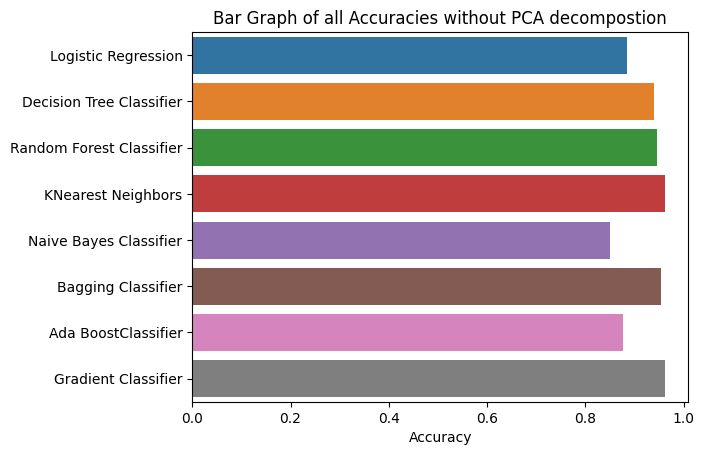

<Figure size 1000x800 with 0 Axes>

In [93]:
import seaborn as sns
sns.barplot(x=x_ax,y=y_ax)
plt.xlabel('Accuracy')
plt.title('Bar Graph of all Accuracies without PCA decompostion')
plt.figure(figsize=(10,8))
plt.savefig("Bar Graph wihtout PCA")

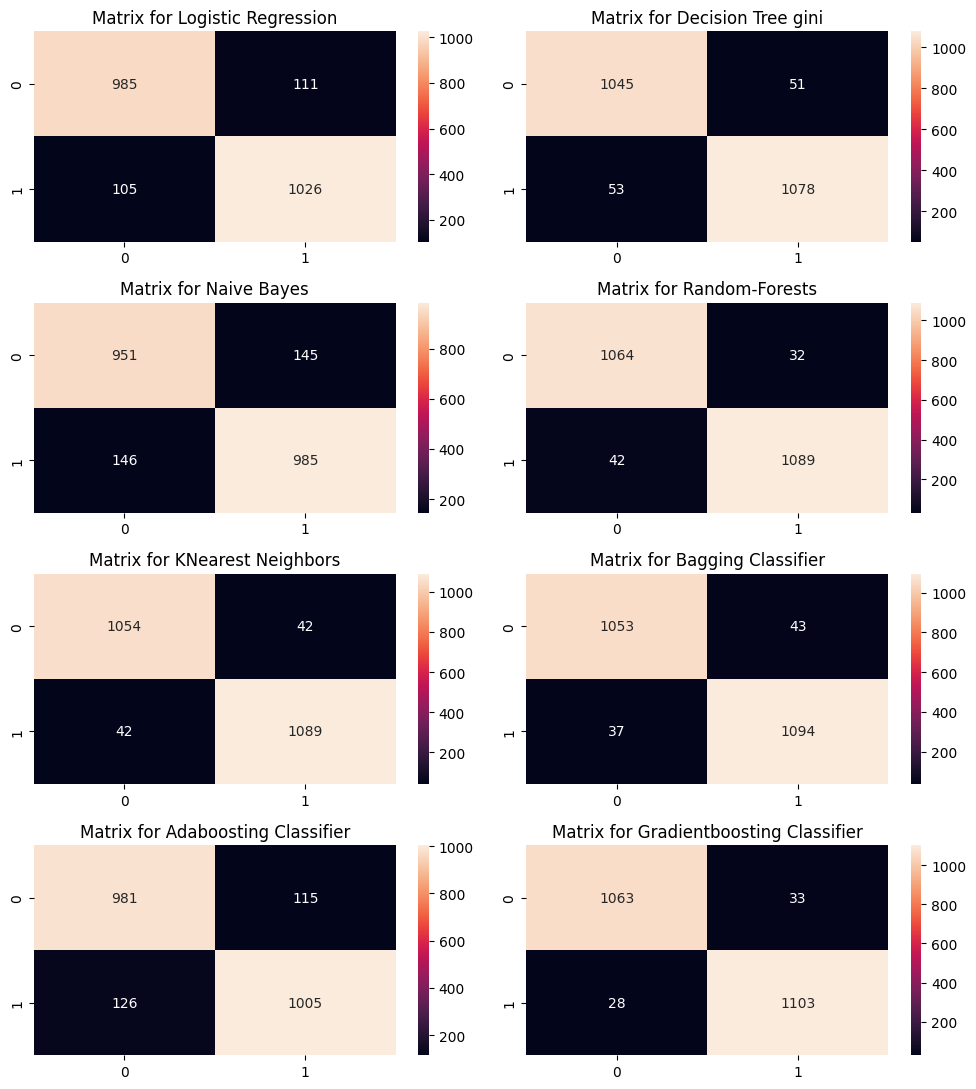

<Figure size 640x480 with 0 Axes>

In [98]:
from sklearn.model_selection import cross_val_predict
from mlxtend.evaluate import confusion_matrix
# plt.title("CONFUSION MATRIX OF ALL MODELS WITHOUT PCA")
f,ax=plt.subplots(4,2,figsize=(10,11))
y_pred = cross_val_predict(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4783, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred,binary=True),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for Logistic Regression')

y_pred_dt_gini_train = cross_val_predict(DecisionTreeClassifier(criterion='entropy',random_state=0),X, y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred_dt_gini_train,binary=True),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Decision Tree gini')

y_pred = cross_val_predict(GaussianNB(),X, y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred,binary=True),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Naive Bayes')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=12,random_state=0),X, y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred,binary=True),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Random-Forests')


y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors= 12, weights= 'distance'),X, y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred,binary=True),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for KNearest Neighbors')


y_pred = cross_val_predict(BaggingClassifier(n_estimators=9,random_state=0),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred,binary=True),ax=ax[2,1],annot=True,fmt='2.0f')
ax[2,1].set_title("Matrix for Bagging Classifier")

y_pred = cross_val_predict(AdaBoostClassifier(n_estimators=8),X, y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred,binary=True),ax=ax[3,0],annot=True,fmt='2.0f')
ax[3,0].set_title('Matrix for Adaboosting Classifier')

y_pred = cross_val_predict(GradientBoostingClassifier(n_estimators=70),X, y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred,binary=True),ax=ax[3,1],annot=True,fmt='2.0f')
ax[3,1].set_title('Matrix for Gradientboosting Classifier')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.tight_layout()
plt.show()
plt.savefig('Confusion_matrix_of all Models.jpg')


Tuning the models

In [69]:
#Random Forest

rf_var=[]
for val in np.arange(1,50):
    rf=RandomForestClassifier(criterion='entropy',n_estimators=val,random_state=0)
    kfold = KFold(shuffle=True,n_splits=3, random_state=0)
    cv_results = cross_val_score(rf, X, y, cv=kfold, scoring='roc_auc')
    rf_var.append(np.var(cv_results,ddof=1))
    # print(val,np.var(cv_results,ddof=1))

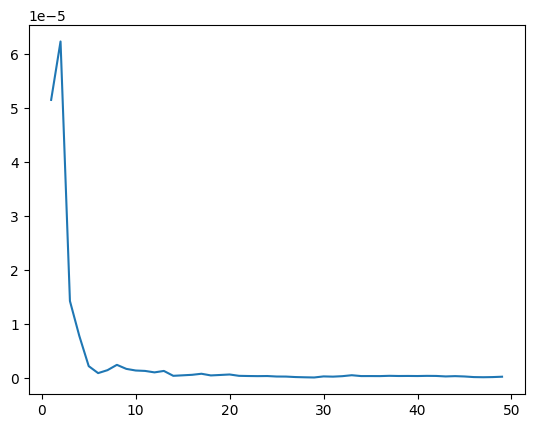

In [70]:
x_axis=np.arange(1,50)
plt.plot(x_axis,rf_var)

n_estimators for random forest taken is 15

In [71]:
## Bagging Classifier
bag_var=[]
for val in np.arange(1,100):
    bag=BaggingClassifier(n_estimators=val,random_state=0)
    kfold = KFold(shuffle=True,n_splits=3, random_state=0)
    cv_results = cross_val_score(bag, X, y, cv=kfold, scoring='roc_auc')
    bag_var.append(np.var(cv_results,ddof=1))
    # print(val,np.var(cv_results,ddof=1))

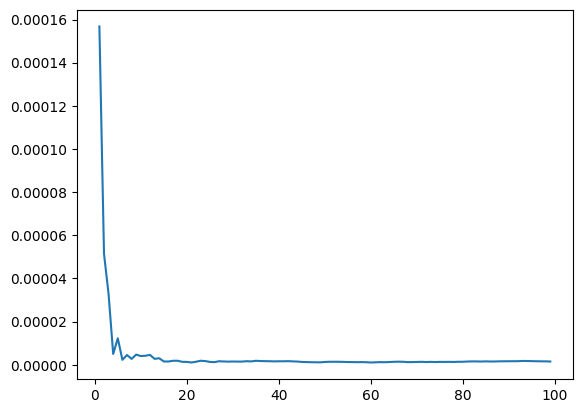

In [72]:
x_axis=np.arange(1,100)
plt.plot(x_axis,bag_var)

N_Estimator taken is 9 for Bagging classifier

In [79]:
#Adaboost Classifier
ada_bias=[]
for val in np.arange(1,100):
    ada=AdaBoostClassifier(n_estimators=val,random_state=0)
    kfold = KFold(shuffle=True,n_splits=3, random_state=0)
    cv_results = cross_val_score(ada, X, y, cv=kfold, scoring='roc_auc')
    ada_bias.append(1-np.mean(cv_results))
    # print(val,1-np.mean(cv_results))

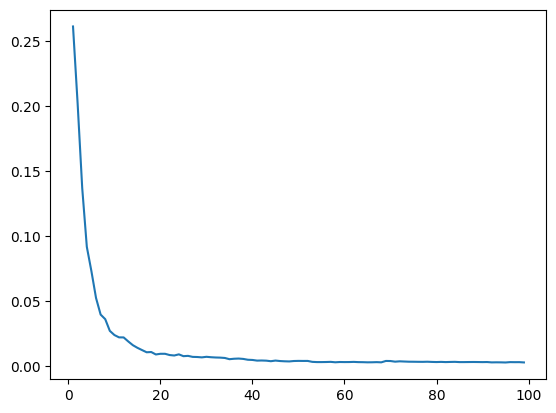

In [74]:
x_axis=np.arange(1,100)
plt.plot(x_axis,ada_bias)

n-estimator taken for adaboost is 8

In [81]:
#Gradient Boost Classifier
gb_bias=[]
for val in np.arange(1,200):
    gb=GradientBoostingClassifier(n_estimators=val)
    kfold = KFold(shuffle=True,n_splits=3, random_state=0)
    cv_results = cross_val_score(gb, X, y, cv=kfold, scoring='roc_auc')
    gb_bias.append(1-np.mean(cv_results))
    # print(val,1-np.mean(cv_results))

1 0.10368613567384288
2 0.0702987411316659
3 0.06152823677791874
4 0.052292463783520926
5 0.04318710639789192
6 0.03584680582126276
7 0.02982624428085623
8 0.02721633180171157
9 0.025531005075413837
10 0.022339580591830388
11 0.021537880950885935
12 0.01953963318598939
13 0.0183371204718753
14 0.017278122904418436
15 0.01654771803236843
16 0.015434747188320497
17 0.014235813345799264
18 0.013826317487965256
19 0.013004466436404738
20 0.011918598680195736
21 0.011321248783887072
22 0.010887843547340181
23 0.010587230336445264
24 0.01006940313977367
25 0.009283850130323956
26 0.008634326610766574
27 0.00851172760639407
28 0.008164598115877109
29 0.00802590961440508
30 0.007750744928040398
31 0.007842279864506363
32 0.007467009384258483
33 0.006861136063192941
34 0.00684945977389495
35 0.006454578753862794
36 0.006377105372496472
37 0.006338802609264005
38 0.006177702128683182
39 0.006005611811987666
40 0.006093742773741417
41 0.005759604748414193
42 0.00575008838288904
43 0.0057861232779

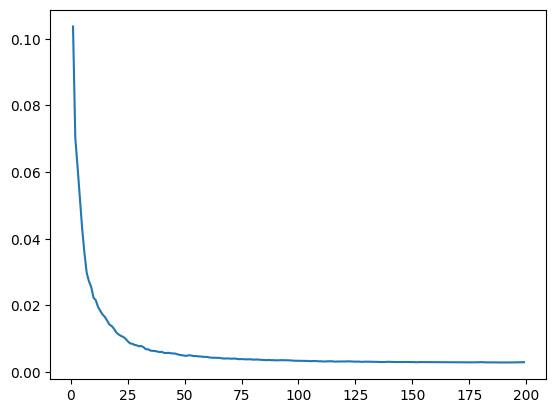

In [82]:
x_axis=np.arange(1,200)
plt.plot(x_axis,gb_bias)

N-estimator taken for gradient booster algorithm is 70

In [83]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier
stacked=VotingClassifier(estimators=[('Logistic',lr),('RandomForest',rf),('GBoost',gb)],voting='soft')

In [84]:
classifiers

[['Logistic Regression :', LogisticRegression()],
 ['Decision Tree Classification :',
  DecisionTreeClassifier(criterion='entropy', random_state=0)],
 ['Random Forest Classification :',
  RandomForestClassifier(n_estimators=12, random_state=0)],
 ['Knn Classifier:', KNeighborsClassifier(n_neighbors=12, weights='distance')],
 ['Naive Bayes Classifier:', GaussianNB()],
 ['Bagging Classifier:', BaggingClassifier(n_estimators=85, random_state=0)]]

In [99]:
# stack=[]
# for val in np.arange(1,100):
#     gb=VotingClassifier(n_estimators=classifiers)
#     kfold = KFold(shuffle=True,n_splits=3, random_state=0)
#     cv_results = cross_val_score(gb, X, y, cv=kfold, scoring='roc_auc')
#     gb_bias.append(1-np.mean(cv_results))
#     print(val,1-np.mean(cv_results))

COMPARING TWO BEST MODELS

In [100]:
KNN=KNeighborsClassifier(n_neighbors= 12, weights= 'distance')
GDB=GradientBoostingClassifier(n_estimators=70)

In [101]:
KNN.fit(X_train,y_train)
GDB.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=70)

In [102]:
KNN_y_pred= KNN.predict(X_test)
GDB_y_pred = GDB.predict(X_test)

In [103]:
d= KNN.predict_proba(X_test)
d

array([[0.76186951, 0.23813049],
       [1.        , 0.        ],
       [0.        , 1.        ],
       ...,
       [0.06488667, 0.93511333],
       [0.84467178, 0.15532822],
       [1.        , 0.        ]])

In [104]:
d=GDB.predict_proba(X_test)
d

array([[0.34135938, 0.65864062],
       [0.99665946, 0.00334054],
       [0.00848476, 0.99151524],
       ...,
       [0.03822678, 0.96177322],
       [0.60425131, 0.39574869],
       [0.98619839, 0.01380161]])

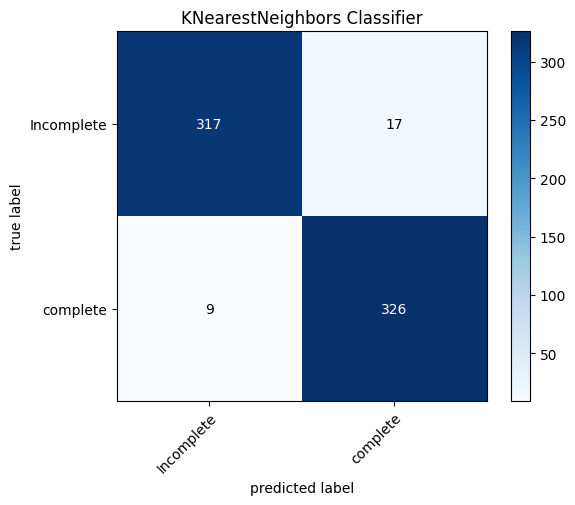

In [138]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix 

binary= np.array(confusion_matrix(y_test,KNN_y_pred))
# sns.heatmap(cm,annot=True)
class_names=["Incomplete","complete"]
fig, ax = plot_confusion_matrix(conf_mat=binary,
                                colorbar=True,
                                show_absolute=True,
                                class_names=class_names)
plt.title("KNearestNeighbors Classifier")   
fig.show()

In [146]:
from sklearn.metrics import classification_report
print("KNeighborsClassifier\n")
print(classification_report(y_test,KNN_y_pred))

KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       334
           1       0.95      0.97      0.96       335

    accuracy                           0.96       669
   macro avg       0.96      0.96      0.96       669
weighted avg       0.96      0.96      0.96       669



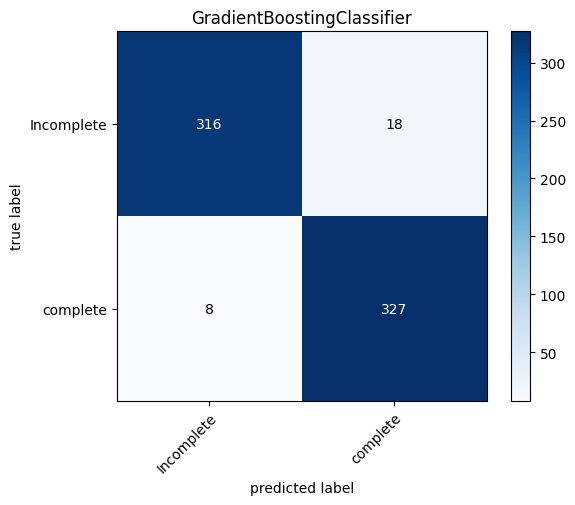

In [137]:
binary2= np.array(confusion_matrix(y_test,GDB_y_pred))
# sns.heatmap(cm,annot=True)
class_names=["Incomplete","complete"]
fig, ax = plot_confusion_matrix(conf_mat=binary2,
                                colorbar=True,
                                show_absolute=True,
                                class_names=class_names)
plt.title("GradientBoostingClassifier")                           
fig.show()

In [145]:
from sklearn.metrics import classification_report
print("GradientBoost Classifier:\n")
print(classification_report(y_test,GDB_y_pred))

GradientBoost Classifier:

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       334
           1       0.95      0.98      0.96       335

    accuracy                           0.96       669
   macro avg       0.96      0.96      0.96       669
weighted avg       0.96      0.96      0.96       669



SAVE THE TWO MODELS

In [116]:
dump(KNN,"KNeighborsClassifier.pkl")
dump(GDB,"GradientboostClassifier.pkl")

['GradientboostClassifier.pkl']

In [20]:
test_data = np.array([59,55,4,0.34,0.66]).reshape(1, -1)
#load the Scaler for this data
scaler=load("model_scaler.pkl")
scale_data = scaler.transform(test_data)
scale_data

array([[ 0.15531183,  1.29592917, -1.05219996, -0.57611014,  0.57611014]])

In [4]:
scale_data.shape

(1, 5)

In [5]:
data=np.array([0.531923,1.112152,	-0.440522,	0.720838,	-0.720838]).reshape(1, -1)
back=scaler.inverse_transform(data)
back

array([[69.00000714, 50.99999656, 18.00000942,  0.70999997,  0.29000003]])

In [6]:
scaler.transform(back)

array([[ 0.531923,  1.112152, -0.440522,  0.720838, -0.720838]])

In [7]:
finalclassifier1= load("KNeighborsClassifier.pkl")

In [8]:
finalclassifier1= load("KNeighborsClassifier.pkl")
finalclassifier1.predict(scale_data)

array([0], dtype=int64)

In [11]:
finalclassifier1.predict_proba(scale_data)[0][1]

0.0

In [12]:
finalclassifier2=load("GradientboostClassifier.pkl")
finalclassifier2.predict(scale_data)

array([0], dtype=int64)

In [18]:
finalclassifier2.predict_proba(scale_data)[0]

array([0.99580929, 0.00419071])

In [126]:
X_test

,Target_Days,Actual_Days,Remaining_Days,Actual_Work,Remaining_Work
1045,0.531923,1.112152,-0.440522,0.720838,-0.720838
1503,-1.012182,-0.082398,-1.095891,-1.417374,1.417374
834,-1.464115,-1.231005,-0.527905,0.300206,-0.300206
791,-1.313471,-0.633730,-0.921126,0.966207,-0.966207
428,-1.125165,-1.139116,-0.222066,-0.751373,0.751373
...,...,...,...,...,...
336,-0.710893,-0.909395,0.040081,-1.382321,1.382321
2011,0.795550,-0.725618,1.612967,-0.050320,0.050320
434,-0.899199,-1.047228,-0.047301,-0.716321,0.716321
1910,-0.635571,-0.909395,0.127464,-1.207058,1.207058


In [127]:
y_test[1045]

0

## THE END

Deploying an API

In [9]:
df.columns

Index(['Target_Days', 'Actual_Days', 'Remaining_Days', 'Actual_Work',
       'Remaining_Work', 'Label'],
      dtype='object')

In [21]:
json_data = {
                    "createdAt":"2023-02-05T18:20:00",
                    "updatedAt":"2023-02-06T18:20:00",
                    "progress":"80",
                    "targetDate":"2023-02-07T23:59:59"
                    }

cr_date= json_data["createdAt"].split("T")[0]
cr_date= dt.strptime(cr_date,"%Y-%m-%d")


up_date= json_data["updatedAt"].split("T")[0]
up_date= dt.strptime(up_date,"%Y-%m-%d")

act_work = json_data["progress"]

trg_date= json_data["targetDate"].split("T")[0]
trg_date= dt.strptime(trg_date,"%Y-%m-%d")

Target_Days = trg_date - cr_date
Target_Days = Target_Days.days #1st Attribute

Actual_Days =  up_date - cr_date
Actual_Days= Actual_Days.days#2nd Attribute

Remaining_Days = Target_Days - Actual_Days #3rd Attribute

Actual_Work = int(json_data["progress"])/100  #4th Attribute
Remaining_Work = 1 - Actual_Work #5th Attribute

#typecast into array
test_data = np.array([Target_Days, Actual_Days, Remaining_Days, Actual_Work, Remaining_Work]).reshape(1,-1)
print(test_data)

scale_data = scaler.transform(test_data)
print(scale_data)

[[2.  1.  1.  0.8 0.2]]
[[-1.99137029 -1.18506055 -1.18327372  1.036312   -1.036312  ]]


In [17]:
scale_data

array([[-1.99137029, -1.18506055, -1.18327372,  1.036312  , -1.036312  ]])

In [18]:
from datetime import datetime as dt
from dateutil import relativedelta as rd
import pickle
scaler=pickle.load(open("model_scaler.pkl","rb"))
json_data={
"createdAt":"2023-02-05T18:20:00",
"updatedAt":"2023-02-06T18:20:00",
"progress":"80",
"targetDate":"2023-02-07T23:59:59"
}

In [17]:
cr_date= json_data["createdAt"].split("T")[0]
cr_date= dt.strptime(cr_date,"%Y-%m-%d")


up_date= json_data["updatedAt"].split("T")[0]
up_date= dt.strptime(up_date,"%Y-%m-%d")

act_work = int(json_data["progress"])

trg_date= json_data["targetDate"].split("T")[0]
trg_date= dt.strptime(trg_date,"%Y-%m-%d")

In [34]:
Target_Days = trg_date - cr_date
Target_Days = Target_Days.days #1st Attribute
Target_Days


2

In [37]:
Actual_Days =  up_date - cr_date
Actual_Days= Actual_Days.days#2nd Attribute
Actual_Days

1

In [35]:
Remaining_Days = Target_Days - Actual_Days #3rd Attribute
Remaining_Days

1

In [38]:
Actual_Work = int(json_data["progress"])/100  #4th Attribute
Remaining_Work = 1 - Actual_Work #5th Attribute


0.8

In [16]:
i="2023-02-05T18:20:00"
i=i.split("T")[0]
i = dt.strptime(i,"%Y-%m-%d")
i

'05-02-2023'

In [26]:
diff= rd.relativedelta(trg_date,cr_date)
diff

relativedelta(days=+2)